In [108]:
# 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings(action='ignore')

In [109]:
#데이터 불러오기
df = pd.read_csv('data3.csv')
print(df.dtypes)

number_people             int64
date                     object
timestamp                 int64
day_of_week               int64
is_weekend                int64
is_holiday                int64
temperature             float64
is_start_of_semester      int64
is_during_semester        int64
month                     int64
hour                      int64
dtype: object


In [110]:
#데이터 가공
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda x: x.month)
df['day'] = df['date'].apply(lambda x: x.day)
df['hour'] = df['date'].apply(lambda x: x.hour)
df['minute'] = df['date'].apply(lambda x: x.minute)

#df = df.drop('date', axis=1)
df['date'] = pd.to_datetime(df['date'], utc=True).dt.strftime('%Y%m%d%H%M').astype(int)

print(df.dtypes)

#y 데이터 설정 - 사용 인원
y = df['number_people']
#x 데이터 설정에서 제거 - 인원, 타임스탬프
X = df.drop(['number_people','timestamp','date'], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    

number_people             int64
date                      int64
timestamp                 int64
day_of_week               int64
is_weekend                int64
is_holiday                int64
temperature             float64
is_start_of_semester      int64
is_during_semester        int64
month                     int64
hour                      int64
day                       int64
minute                    int64
dtype: object


In [111]:
X_train

,date,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,day,minute
88741,0.299741,-0.487071,-0.626311,-0.051356,-0.951746,-0.291660,0.719810,-0.710994,0.413626,-0.554484,-0.792471
119921,0.450120,0.013211,-0.626311,-0.051356,-1.133218,-0.291660,-1.389255,1.324260,-0.182193,0.692103,-1.427739
36814,0.344969,1.514060,1.596650,-0.051356,0.934124,-0.291660,-1.389255,-0.129493,1.456309,0.918755,-1.369988
110383,0.406528,1.514060,1.596650,-0.051356,-0.886991,-0.291660,0.719810,0.742759,-1.522785,0.012147,1.748601
61277,2.371926,-0.487071,-0.626311,-0.051356,1.214725,-0.291660,0.719810,-1.292496,0.115717,-0.894462,0.766823
...,...,...,...,...,...,...,...,...,...,...,...
50057,0.409280,1.013777,1.596650,-0.051356,1.126788,-0.291660,0.719810,0.742759,-1.373830,1.485386,0.997830
98047,0.343506,-1.487637,-0.626311,-0.051356,-1.030090,-0.291660,-1.389255,-0.129493,-0.926966,0.238799,0.420313
5192,-1.710506,-0.987354,-0.626311,-0.051356,1.149971,-0.291660,0.719810,0.742759,1.605263,-1.121114,-0.503713
77708,0.217222,0.013211,-0.626311,-0.051356,-1.090848,3.428645,0.719810,-1.873997,-1.820694,0.578777,0.073803


In [112]:
models={
    "Linear Regression (Ridge)":Ridge(),
    "       Random Forest     ":RandomForestRegressor()
}

for name,model in models.items():
    model.fit(X_train,y_train)
    print(name+" Trained")

Linear Regression (Ridge) Trained
       Random Forest      Trained


In [113]:
def get_rmse(y_test, y_pred):
    rmse = np.sqrt(np.mean((y_test - y_pred)**2))
    return rmse
def get_r2(y_test,y_pred):
    r2=1-(np.sum((y_test-y_pred)**20)/np.sum((y_test-y_test.mean())**2))
    return r2

In [114]:
for name ,model in models.items():
    y_pred=model.predict(X_test)
    rmse=get_rmse(y_test,y_pred)
    print(name+"RMSE:{:.2f}".format(rmse))

Linear Regression (Ridge)RMSE:14.84
       Random Forest     RMSE:4.08


In [115]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = get_r2(y_test, y_pred)
    print(name + " R^2: {:.5f}".format(r2))

Linear Regression (Ridge) R^2: -8953920981173221900488328347648.00000
       Random Forest      R^2: -1028794691982957985398784.00000


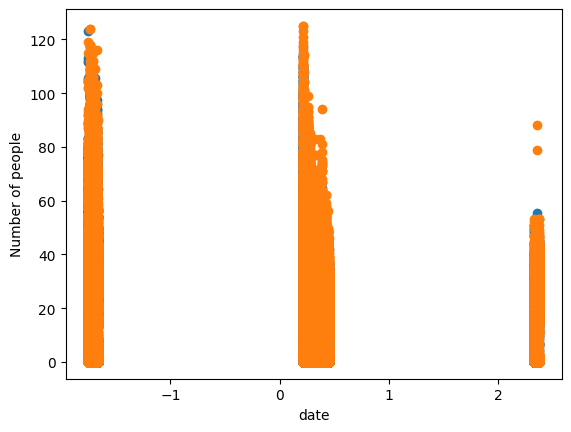

In [120]:
# 그래프 그리기
#df_hour_mean.plot(kind='line', y='number_people', xticks=df_hour_mean.index)
pred = models["       Random Forest     "].predict(X_test)
plt.scatter(X_test['date'], pred)
plt.scatter(X_test['date'], y_test)

plt.xlabel('date')
plt.ylabel('Number of people')
plt.show()

In [ ]:
#여기에서 랜덤포레스트 모델 뽑아낼 예정